In [2]:
import numpy as np
import matplotlib.pyplot as plt

# City Population (in units of 10,000s)
x_train = np.array([
  6.1101, 5.5277, 8.5186, 7.0032, 5.8598,
  8.3829, 7.4764, 8.5781, 6.4862, 5.0546,
  5.7107, 14.164, 5.7340, 8.4084, 5.6407,
  5.3794, 6.3654, 5.1301, 6.4296, 7.0708,
  6.1891, 20.27, 5.4901, 6.3261, 5.5649,
  18.945, 12.828, 10.957, 13.176, 22.203,
  5.2524, 6.5894, 9.2482, 5.8918, 8.2111,
  7.9334, 8.0959, 5.6063, 12.836, 6.3536,
  5.4069, 6.8825, 11.708, 7.3379, 6.6034,
  5.6602, 11.014, 7.3500, 6.4575, 5.5358
])

# Monthly Profit (in units of $10,000s)
y_train = np.array([
  17.592, 9.1302, 13.662, 11.854, 6.8233,
  11.886, 4.3483, 12.0, 6.5987, 3.8166,
  3.2522, 15.505, 3.1551, 7.2258, 0.71618,
  3.5129, 5.3048, 0.56077, 3.6518, 5.3893,
  3.1386, 21.767, 4.2630, 5.1875, 3.0825,
  22.638, 13.501, 7.0467, 14.692, 24.147,
  1.839, 4.2885, 7.7754, 0.2708, 8.2415,
  6.7981, 8.3753, 2.9923, 12.134, 1.8495,
  2.193, 4.4043, 10.556, 5.3894, 3.582,
  1.6609, 9.945, 5.7442, 3.3770, 2.1071
])


Total cost: 6.229022289292743 in iteration 0
Total cost: 4.869317322360822 in iteration 100
Total cost: 4.672225343934406 in iteration 200
Total cost: 4.534426927998094 in iteration 300
Total cost: 4.438084075355585 in iteration 400
Total cost: 4.370725207750124 in iteration 500
Total cost: 4.323630722579274 in iteration 600
Total cost: 4.290704240701667 in iteration 700
Total cost: 4.267683430411391 in iteration 800
Total cost: 4.251588248776411 in iteration 900


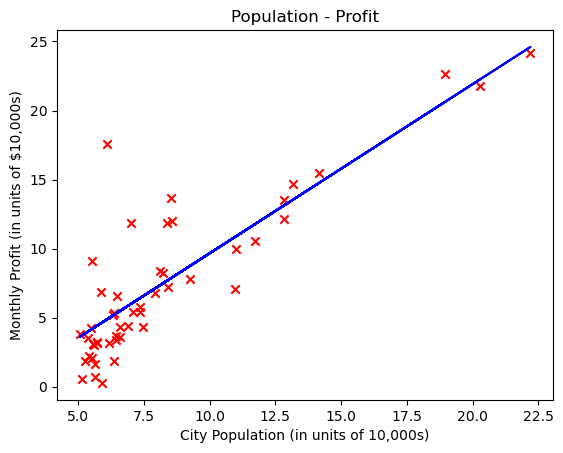

In [ ]:
def predict(x, w, b):
    return np.dot(x, w) + b

def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0
    """
    for i in range(m):
        cost += (predict(x[i], w, b) - y[i])**2
    cost = cost / (2*m)
    """

    # Shortcut for calculating cost function
    cost = np.sum((predict(x, w, b) - y)**2) / (2*m)

    return cost
    

def gradient_descent(x, y, w, b, alpha, num_iters):

    m = x.shape[0]

    for i in range(num_iters):

        # Computing gradients
        dj_dw = (1/m) * np.sum((predict(x, w, b) - y) * x) 
        dj_db = (1/m) * np.sum(predict(x, w, b) - y)

        # Updating w and b
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Printing cost in every 100 iteration adjust convergence
        if i% 100 == 0:
            print(f"Total cost: {compute_cost(x, y, w, b)} in iteration {i}")

    return w, b



initial_w = 0
initial_b = 0
alpha = 0.01
num_iters = 1000

final_w, final_b = gradient_descent(x_train, y_train, initial_w, 
                                    initial_b, alpha, num_iters)

# Model prediction
plt.plot(x_train, predict(x_train, final_w, final_b), c='b',label='Our Prediction')
# Data points
plt.scatter(x_train, y_train, marker='x', c='r') 

plt.title("Population - Profit")
plt.ylabel('Monthly Profit (in units of $10,000s)')
plt.xlabel('City Population (in units of 10,000s)')
plt.show()
